# Exploring the housing market of Saint Pietersburg

The data set for this research is the Yandex.Realty archive of ads for the apartments sal in St. Petersburg and neighboring settlements. 

The main goal of this research is to understand what affects the realty prices. The outcome of the research will be used to build an automated system that will track anomalies and fraudulent activity.

There are two types of data available for each apartment for sale. The first type is the data that was entered by the user, the second type is the data that obtained automatically based on cartography. For example, the distance to the center, airport, nearest park and so on.

The table contains the following data:

* 'airports_nearest` — distance to the nearest airport in meters (m)
* 'balcony` — number of balconies
* 'ceiling_height` — ceiling height (m)
* 'cityCenters_nearest` - distance to the city center (m)
* 'days_exposition` — how many days the ad was placed (from publication to removal)
* 'first_day_exposition` — date of publication
* 'floor` - floor
* 'floors_total` — total floors in the house
* 'is_apartment` - apartments (boolean type)
* 'kitchen_area` — kitchen area in square meters (m2)
* 'last_price` - price at the time of withdrawal from publication
* 'living_area` — living area in square meters(m2)
* 'locality_name` — name of the locality
* 'open_plan` — free layout (boolean type)
* 'parks_around3000` — the number of parks within a 3 km radius
* 'parks_nearest` — distance to the nearest park (m)
* 'ponds_around3000` — number of reservoirs within a radius of 3 km
* 'ponds_nearest` — distance to the nearest reservoir (m)
* 'rooms` — number of rooms
* 'studio` — studio apartment (boolean type)
* 'total_area` — the area of the apartment in square meters (m2)
* 'total_images` — the number of photos of the apartment in the ad

The research includes the following stages:

1. Data investigation.
2. Data cleanup.
3. Data analysis.
4. Follow up.

# Data investigation

First thing to do is to load tha data and check it's shape.

In [95]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# libraries import
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
!pip install pymystem3==0.1.10
from pymystem3 import Mystem
m = Mystem()
from matplotlib import pyplot as plt


In [97]:
# data import
df = pd.read_csv("/content/drive/MyDrive/da_portfolio/real_estate_data.csv", sep="\t") 
display(df.head(10))
display(df.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

Now the data is loaded and I can see that not all data can be used for analysis the way it is now: the number of rows in columns is not equal, some cells have `NaN` as a value, also there is a need to check the data for duplicates. 





# Data cleanup

I will start with checking for duplicates.

In [98]:
# converting ;ocality to the lowercase
df["locality_name"] = df["locality_name"].str.lower()

# checking for duplicates in the wholde dataframe
print("The number of duplicates is:", df.duplicated().sum())

The number of duplicates is: 0


Well, now I know that there are no duplicates, so I can move on with my data cleanup. The next step is to decide what to do with unequal number of rows in columns.  

In general unequal number of rows means, that some cells are not filled with the porper data. I will check the amount of such cells per row and will also check if everything is fine with the columns' names.

In [99]:
# checking the columns' names
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

No spaces, no camelcase. All fine.

In [100]:
# checking the amount of  null in the column
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

So now I can see that the amount of null values in the dataset is high. Nearly every column has some. Here I decide what to do with such values, and I will start with the understandig what columns I will use for the further analysis.     

It looks like I will need the following columns:

* `ceiling_height`
* `floors_total`
* `locality_name`
* `cityCenters_nearest`
* `days_exposition`
* `living_area`
* `kitchen_area`

So I will run the data cleanup only on them, avoiding doing anything to the other columns.

**Ceiling height** (`ceiling_height`) - currently, the ceiling height in new and old buildings is approximately the same 2.5 - 2.8 m. The exception is "stalinka", where the ceiling height can reach 3+ meters. I do not have the type/year of construction in the table, so there is no category to rely on when filling in the gaps. Therefore, the median of the `ceiling_height` category will be used to fill in the gaps.

In [101]:
# checking the median value
print("The median is:", df["ceiling_height"].median(), "meters")

The median is: 2.65 meters


In [102]:
# filling the gaps with median value
df["ceiling_height"].fillna((df["ceiling_height"].median()), inplace=True)

**Total floors in the house** (`floors_total`) - as well as with the height of the ceilings, data on the year of construction or type of construction is required. In addition, we have the `floor` parameter, which complicates filling in the gaps in this column: I can fill in the gap in `floors_total` with a median equal to 9 while in the `floor` column it will be indicated that the client lives on the 13th floor.

In order not to complicate the task, I'm looking at the percentage of omissions in `floors_total`, which is 0.36% of the total number of rows. This is a small percentage, so lines with omissions can be deleted.

In order to be able to apply some functions to the column values, I change the data type to numeric.

In [103]:
# deleting NaN
df = df.dropna(subset=["floors_total"])

# changing the cityCenters_nearest datatype to 'int'
df["floors_total"] = df["floors_total"].astype("int")


**The name of the locality** (`locality_name`) - just like with the number of floors of houses, the number of lines with gaps is small, there are no parameters to rely on to fill them in, so I delete the lines with gaps.

In [104]:
# deleting NaN
df = df.dropna(subset=["locality_name"])

**Proximity to the center** (`city Center s_nearest`) - gaps in the data here ara due to the fact that `citycenter_nearest` cannot be applied to some of the settlments. For example, some villages and towns just do not have the "city center" since they are too small, so there is little difference between the center and the outskirts and remoteness does not affect the price.


For towns and villages that are sattelites of the bigger city, it is possible to indicate the remotness from the main city center, and not to the center of the settlement itself.

In [105]:
# I start with the list of the settlments
df["locality_name"].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [106]:
# checking the amount of items in each category
df["locality_name"].value_counts()

санкт-петербург                    15651
посёлок мурино                       520
посёлок шушары                       439
всеволожск                           398
пушкин                               369
                                   ...  
поселок каложицы                       1
посёлок платформа 69-й километр        1
поселок почап                          1
поселок гончарово                      1
посёлок дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

There are many settlements, but some of them have only 1 value. 

Also, from the names of the cities and towns I can see that mostly all of them are placed around Saint Petersburg. I can understand the size of the settlment from it's name: "village", "settlement", "urban-type settlement" and so on. Cities are recorded simply by names, without additional clarifications.

In order to make it easier to analyze the data, I will leave only the names of localities and lemmatize them to divide into categories.

In [107]:
# lemmatization with categorizing function
def lemm(liveplace):
    lemma = ' '.join(m.lemmatize(liveplace))
    if "поселок город тип" in lemma:
        return lemma.replace("посёлок город тип", '')
    elif "деревня" in lemma:
        return lemma.replace("деревня", '')
    elif "поселок" in lemma:
        return lemma.replace("поселок", '')
    elif "село" in lemma:
        return lemma.replace("село", '')
    elif "товарищество" in lemma:
         return lemma.replace("товарищество", '')
    else:
        pass
    return lemma

# applying to the df and add the result to locality_name_lem
df["locality_name_lem"] = df["locality_name"].apply(lemm)


In [108]:
# checking the results
df["locality_name_lem"].value_counts()

санкт-петербург \n                     15651
   муриный \n                            552
   шушары \n                             439
всеволожск \n                            398
пушкин \n                                369
                                       ...  
   пельгора \n                             1
   каложица \n                             1
   платформа   69 - й   километр \n        1
   почап \n                                1
   дзержинский \n                          1
Name: locality_name_lem, Length: 325, dtype: int64

Now I check data by category.

In [109]:
# data check by category
df.groupby("locality_name_lem")["cityCenters_nearest"].agg([min, max, sum])

,min,max,sum
locality_name_lem,,,
агалатово \n,NaN,NaN,0.0
александровский \n,27352.0,27584.0,54936.0
алексеевка \n,NaN,NaN,0.0
аннино \n,NaN,NaN,0.0
аро \n,NaN,NaN,0.0
...,...,...,...
сосновый бор \n,NaN,NaN,0.0
сясьстрой \n,NaN,NaN,0.0
тихвин \n,NaN,NaN,0.0


From the table above I can see, that the gaps are related with the settlments that are not big enough to have such a parameter as `distance` from the center. In large cities, such as St. Petersburg, Pavlovsk, etc - the `distance` from the center is indicated.

The `sum` column shows that in some categories there is no data for the entire category, which means I have no values to calculate the median.

Filling in the median across the entire column does not seem to be the right solution because in some cases cases the median may be bigger than the settlement diameter.
makes 1.3% of the total number of rows. Since the percentage is small, I delete the lines with gaps so that it will be more convenient to analyze the data in the future.

In [110]:
# deleting the null values
df.dropna(subset=["cityCenters_nearest"], inplace=True)

#checking the duplicates
print("The number of duplicates is:", df["cityCenters_nearest"].isnull().sum())

The number of duplicates is: 0


**Ad placement period** (`days_exposition`) - the reason for gaps in this column are still active ads or ads that have been published for less than a day. 

I can't fill such gaps with zeros or another value, but their presence may affect the analysis, so I delete them from the table.

In [111]:
# deleting the null values
df['days_exposition'] = df['days_exposition'].dropna()

**Living area** (`living_area`) is the total area of rooms intended for living. 

To the gaps in this column, I will ckeck how the living area of other apartments (in the columns without gaps) correlates with the number of rooms, and fill in the gaps with the median.

In [112]:
# checking the number o f rooms
df['rooms'].value_counts().to_frame()

,rooms
2,5888
1,5852
3,4667
4,1051
5,300
0,117
6,101
7,57
8,12
9,8


So, 0.2% of rooms are 0, and 2% (in total) are rooms with 5+ rooms. 

It looks like some kind of mistake occured when data was collected. For example, 0 might be an idicator for studio apratmens, where the  where the living room is combined with the kitchen and, on the other hand, someone counted toilet + kitchen + etc as "rooms" therefore we have a lot of 5+ rooms apts. Or, maybe, someone is selling a whole multi-storey house.

The amount of such data is not statisticaly significant and can be treated as outliers. I am removing this data not to make the further analysis difficult. 


In [113]:
# removing all lines with rooms more than 5
df = df.drop(df[df.rooms >= 5].index)

# removing all lines with rooms  0
df = df.drop(df[df.rooms == 0].index)

# replacing with median by 'rooms' category
df['living_area']=df.groupby('rooms')['living_area'].transform(lambda x: x.fillna(x.median()))

# updating data type to ('int')
df['living_area'] = df['living_area'].astype('int')

The **kitchen area** (`kitchen_area`) is not a living area. The non-residential area, in addition to the kitchen, includes a corridor, bathroom, toilet and so on. Since we do not have all necessary data, we cannot calculate the kitchen area by subtracting the living area from the total area, and then the area of the corridor, balcony, and so on. This means that it is most convenient to fill in the value with the median by category.

There are also studios in the table that may not have a kitchen at all. Therefore, I will first investigate how much studios affect the entire table, and then fill in the gaps with the median.

In [114]:
# checking if the table has studio apartments with declared kitchen area
df.query('studio == True and kitchen_area>=1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_lem


Seems that therea are no such studios. 

Next thing I check is the amount of studio apartments in the table.

In [115]:
# amount of studio apartments in the table.
df["studio"].value_counts()

False    17453
True         5
Name: studio, dtype: int64

Looks like there are only 5 studios. The amount is not statisticaly significant so I can clean up the data and fill in some gaps with median.

In [116]:
# cleanup
df = df.drop(df[df.studio == True].index)

# fillna with  median
df['kitchen_area'].fillna(df['kitchen_area'].median(), inplace=True)

# changing the datatype ('int')
df['kitchen_area'] = df['kitchen_area'].astype('int')

Now the data cleanup is done and I am cheking reults.

In [117]:
# are there any gaps lefrt in ceiling_height, floors_total, locality_name, cityCenters_nearest, days_expositio
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            15376
studio                      0
open_plan                   0
kitchen_area                0
balcony                  8442
locality_name               0
airports_nearest           22
cityCenters_nearest         0
parks_around3000            0
parks_nearest            9779
ponds_around3000            0
ponds_nearest            8808
days_exposition          2179
locality_name_lem           0
dtype: int64

In [118]:
# if table is visually ok
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_lem
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51,8,NaN,...,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,санкт-петербург \n
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18,1,NaN,...,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,шушары \n
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34,4,NaN,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,санкт-петербург \n
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,45,9,NaN,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,санкт-петербург \n
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32,13,NaN,...,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,санкт-петербург \n


All looks fine, just need to adjust data type in `last_pirce` and `total_area` columns.

In [119]:
# changing the data type and cheking if everything is ok
df['last_price'] = df['last_price'].astype(int)
df['total_area'] = df['total_area'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17453 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          17453 non-null  int64  
 1   last_price            17453 non-null  int64  
 2   total_area            17453 non-null  int64  
 3   first_day_exposition  17453 non-null  object 
 4   rooms                 17453 non-null  int64  
 5   ceiling_height        17453 non-null  float64
 6   floors_total          17453 non-null  int64  
 7   living_area           17453 non-null  int64  
 8   floor                 17453 non-null  int64  
 9   is_apartment          2077 non-null   object 
 10  studio                17453 non-null  bool   
 11  open_plan             17453 non-null  bool   
 12  kitchen_area          17453 non-null  int64  
 13  balcony               9011 non-null   float64
 14  locality_name         17453 non-null  object 
 15  airports_nearest   

Ok, as it seems the data is neat and clean and ready for further analysis. 

# Data analysis

Prior the maing part of the data analysis I will add some additional values to the table.





## Additiona values
### Adding price per sq.m

Now I am going to calculate the price per square meter and add it to the table. 

In [120]:
# aq.m price in sqm_price 
df['sqm_price'] = df['last_price']/df['total_area']

# changing the data type
df['sqm_price'] = df['sqm_price'].astype(int)


### Date format

On the top of it it would be nice to know day of the week (dow), month and year of publication of the ad.

I will add them to the following columns:

* `dow` - day of the week
* `month` - month
* `year` - year




In [121]:
# converting date to the better format
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

# and adding columns
df['dow'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year']=df['first_day_exposition'].dt.year

# checking the results
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_lem,sqm_price,dow,month,year
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,...,1.0,482.0,2.0,755.0,NaN,санкт-петербург \n,120370,3,3,2019
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,NaN,...,0.0,NaN,0.0,NaN,81.0,шушары \n,83750,1,12,2018
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,NaN,...,1.0,90.0,2.0,574.0,558.0,санкт-петербург \n,92785,3,8,2015


### Categorizing apartments


All fine, now I will add the apartment floor by category:

* `1` - groud floor
* `2` - last floor
* `3` - any other floor

In [122]:
# adding floor category to  first_last column

def first_last_func(value):
    if value['floor'] == value['floors_total']:
        return "1"
    elif value['floor'] == 1:
         return "2"
    else:
        return "3"


df['first_last'] = df.apply(first_last_func, axis=1)

# and changing the data type
df['first_last'] = df['first_last'].astype(int)

### Residental area ratio

Now I calculate and add the residential to total area ratio and kitchen to total are ratio.


In [123]:
#  residential to total area ratio
df['living_to_total_%'] = df['living_area']/df['total_area']*100
df['living_to_total_%'] = df['living_to_total_%'].astype(int)

# kitchen to total are ratio
df['kitchen_to_total_%'] = df['kitchen_area']/df['total_area']*100
df['kitchen_to_total_%'] = df['kitchen_to_total_%'].astype(int)

# and checking results
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17453 entries, 0 to 23697
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17453 non-null  int64         
 1   last_price            17453 non-null  int64         
 2   total_area            17453 non-null  int64         
 3   first_day_exposition  17453 non-null  datetime64[ns]
 4   rooms                 17453 non-null  int64         
 5   ceiling_height        17453 non-null  float64       
 6   floors_total          17453 non-null  int64         
 7   living_area           17453 non-null  int64         
 8   floor                 17453 non-null  int64         
 9   is_apartment          2077 non-null   object        
 10  studio                17453 non-null  bool          
 11  open_plan             17453 non-null  bool          
 12  kitchen_area          17453 non-null  int64         
 13  balcony         

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_lem,sqm_price,dow,month,year,first_last,living_to_total_%,kitchen_to_total_%
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,...,755.0,NaN,санкт-петербург \n,120370,3,3,2019,3,47,23
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,NaN,...,NaN,81.0,шушары \n,83750,1,12,2018,2,45,27
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,NaN,...,574.0,558.0,санкт-петербург \n,92785,3,8,2015,3,60,14
3,0,64900000,159,2015-07-24,3,2.65,14,45,9,NaN,...,234.0,424.0,санкт-петербург \n,408176,4,7,2015,3,28,5
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,48.0,121.0,санкт-петербург \n,100000,1,6,2018,3,32,41


I calculated the additional data and added it to the table and checked the result - there are no gaps,  all fine.


## EDA



### Total area

I will start with the total area hist.

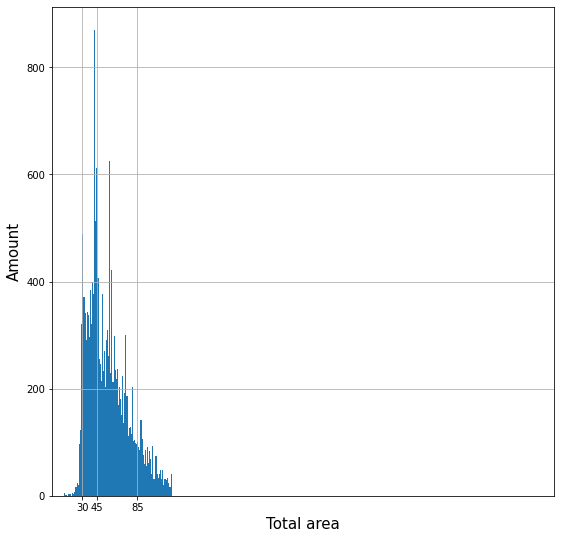

In [127]:
# total area hist
df['total_area'].plot(kind='hist', y='total_area', bins=100, figsize=(9, 9), grid=True) 
plt.xlabel('Total area', fontsize=15)
plt.ylabel('Amount', fontsize=15)

# limiting
plt.xlim([0, 500])

# and additional ticks 
plt.xticks([30, 45, 85])

plt.show()

The total area hist shows that most of the apartmenst have an area of 40-50 sq.m and a lot of apartments with the are of up to 85. After the 85 tick the histogram sharply declines, which means that there are not many apartments with an area of 85 +. And the outliers are apartments with an area of 100+ square meters.

In order for the date to be displayed more accurately, I am removing the outliers.

In [125]:
#  checking the number of outliers
df.query('total_area > 120')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_lem,sqm_price,dow,month,year,first_last,living_to_total_%,kitchen_to_total_%
3,0,64900000,159,2015-07-24,3,2.65,14,45,9,NaN,...,234.0,424.0,санкт-петербург \n,408176,4,7,2015,3,28,5
19,16,14200000,121,2019-01-09,3,2.75,16,76,8,NaN,...,NaN,97.0,санкт-петербург \n,117355,2,1,2019,3,62,9
42,13,22000000,161,2015-07-08,4,2.80,4,80,2,False,...,907.0,987.0,петергоф \n,136645,2,7,2015,3,49,10
51,7,45000000,161,2017-10-17,3,3.20,8,38,4,NaN,...,99.0,541.0,санкт-петербург \n,279503,1,10,2017,3,23,31
121,20,33000000,180,2017-02-17,3,2.90,9,86,8,False,...,NaN,144.0,санкт-петербург \n,183333,4,2,2017,3,47,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,6,11703000,126,2017-06-15,3,2.65,6,60,4,NaN,...,287.0,244.0,санкт-петербург \n,92880,3,6,2017,3,47,11
23574,14,64990000,139,2015-11-24,3,3.00,8,3,8,NaN,...,100.0,280.0,санкт-петербург \n,467553,1,11,2015,1,2,11
23600,8,8700000,132,2018-11-13,3,2.65,9,78,3,NaN,...,NaN,60.0,санкт-петербург \n,65909,1,11,2018,3,59,7
23684,20,21400000,145,2018-11-02,4,3.00,26,71,17,NaN,...,NaN,NaN,санкт-петербург \n,147586,4,11,2018,3,48,10


The amount is not very big (~1%), so I am deleting this data.

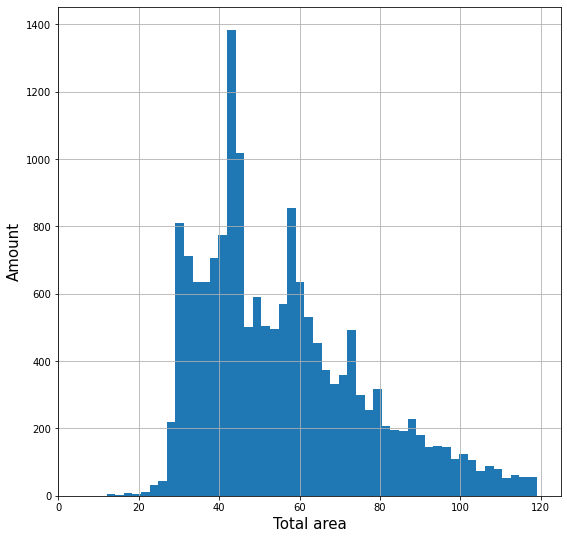

In [128]:
# deleting data
df = df.drop(df[df.total_area >= 120].index)

#and checking results

# total area hist
df['total_area'].plot(kind='hist', y='total_area', bins=50, figsize=(9, 9), grid=True) 
plt.xlabel('Total area', fontsize=15)
plt.ylabel('Amount', fontsize=15)

# limiting
plt.xlim([0, 125])

plt.show()

The histogram shows that most of the apartments are 40-45 sq. m.